In [2]:
# Install gym and matplotlib
!pip install -q gym
!pip install -q matplotlib

import gym
import random
import numpy as np

In [3]:
import gym
import random
import numpy as np

In [4]:
environment = gym.make("FrozenLake8x8-v1", is_slippery=False)
environment.reset()
environment.render()

In [5]:
# Our table has the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)
qtable = np.zeros((64, 8))

# Alternatively, the gym library can also directly g
# give us the number of states and actions using 
# "env.observation_space.n" and "env.action_space.n"
nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

# Let's see how it looks
print('Q-table =')
print(qtable)


Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [6]:
random.choice(["LEFT", "DOWN", "RIGHT", "UP"])

'DOWN'

In [7]:
environment.action_space.sample()
slippery=False
env = gym.make("FrozenLake8x8-v1", is_slippery=False)

env.reset()
env.render()


In [8]:
action = env.action_space.sample()

new_state, reward, done,  info = env.step(action)

env.render()
# env.step(action)
# env.action_space.sample()

print(f'reward = {reward}')
print(f'done = {done}')

reward = 0.0
done = False


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
False

Q-table

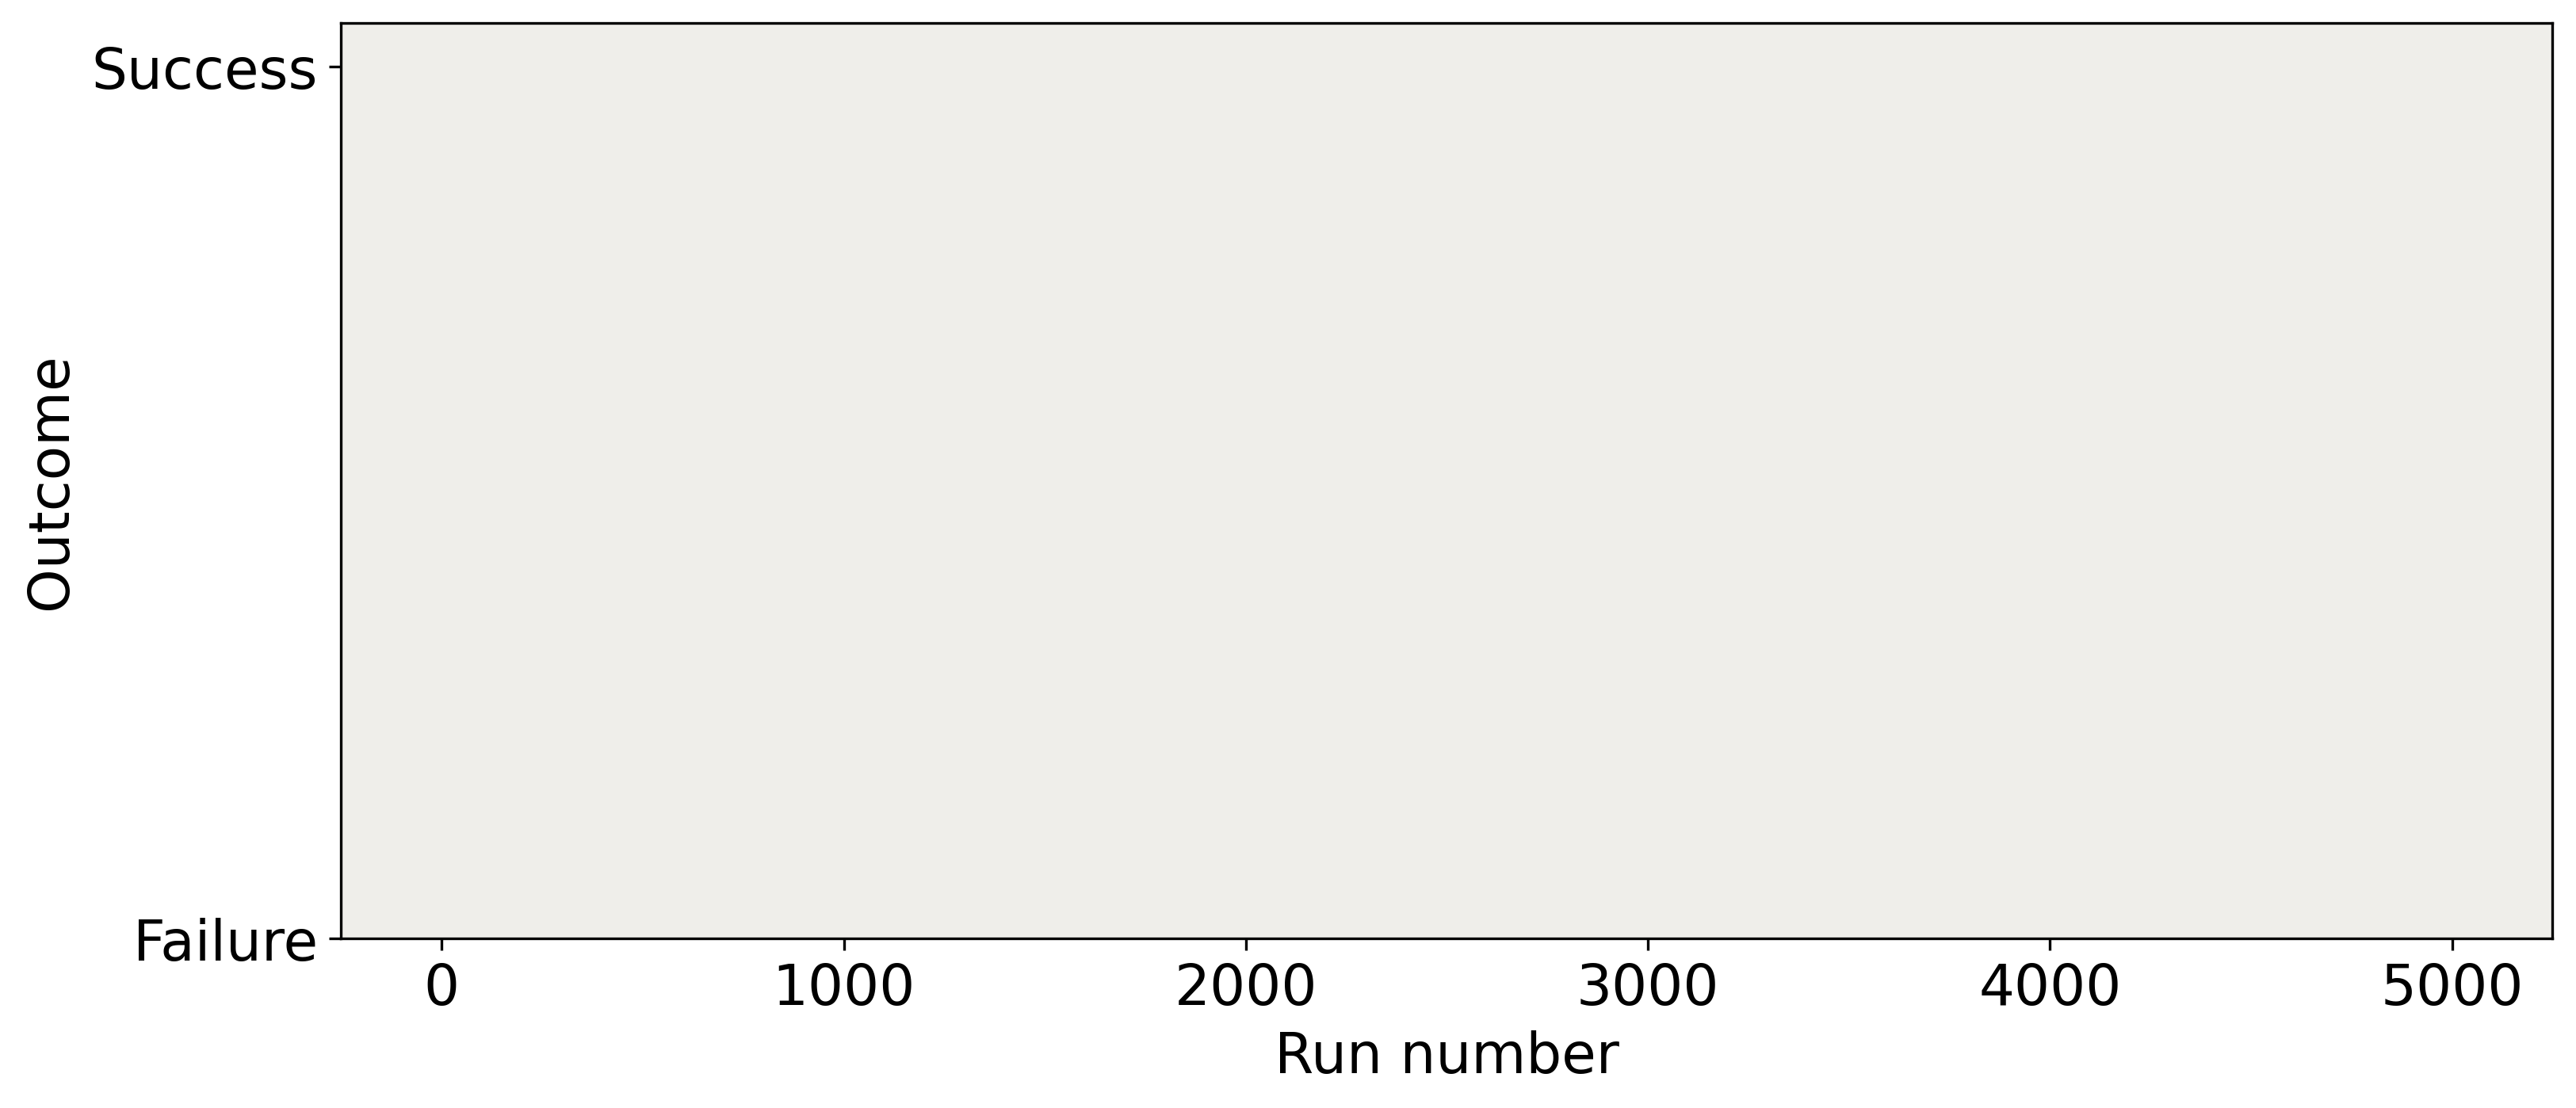

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 5000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []
state = environment.reset()
print('Q-table before training:')
print(qtable)

print(np.max(qtable[0]) > 0)
# Training
for _ in range(episodes):
    state = environment.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[1]) > 0:
          action = np.argmax(qtable[1])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = environment.step(action)

        # Update Q(s,a)
        qtable[1, action] = qtable[1, action] + \
                                alpha * (reward + gamma * np.max(qtable[1]) - qtable[1, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after

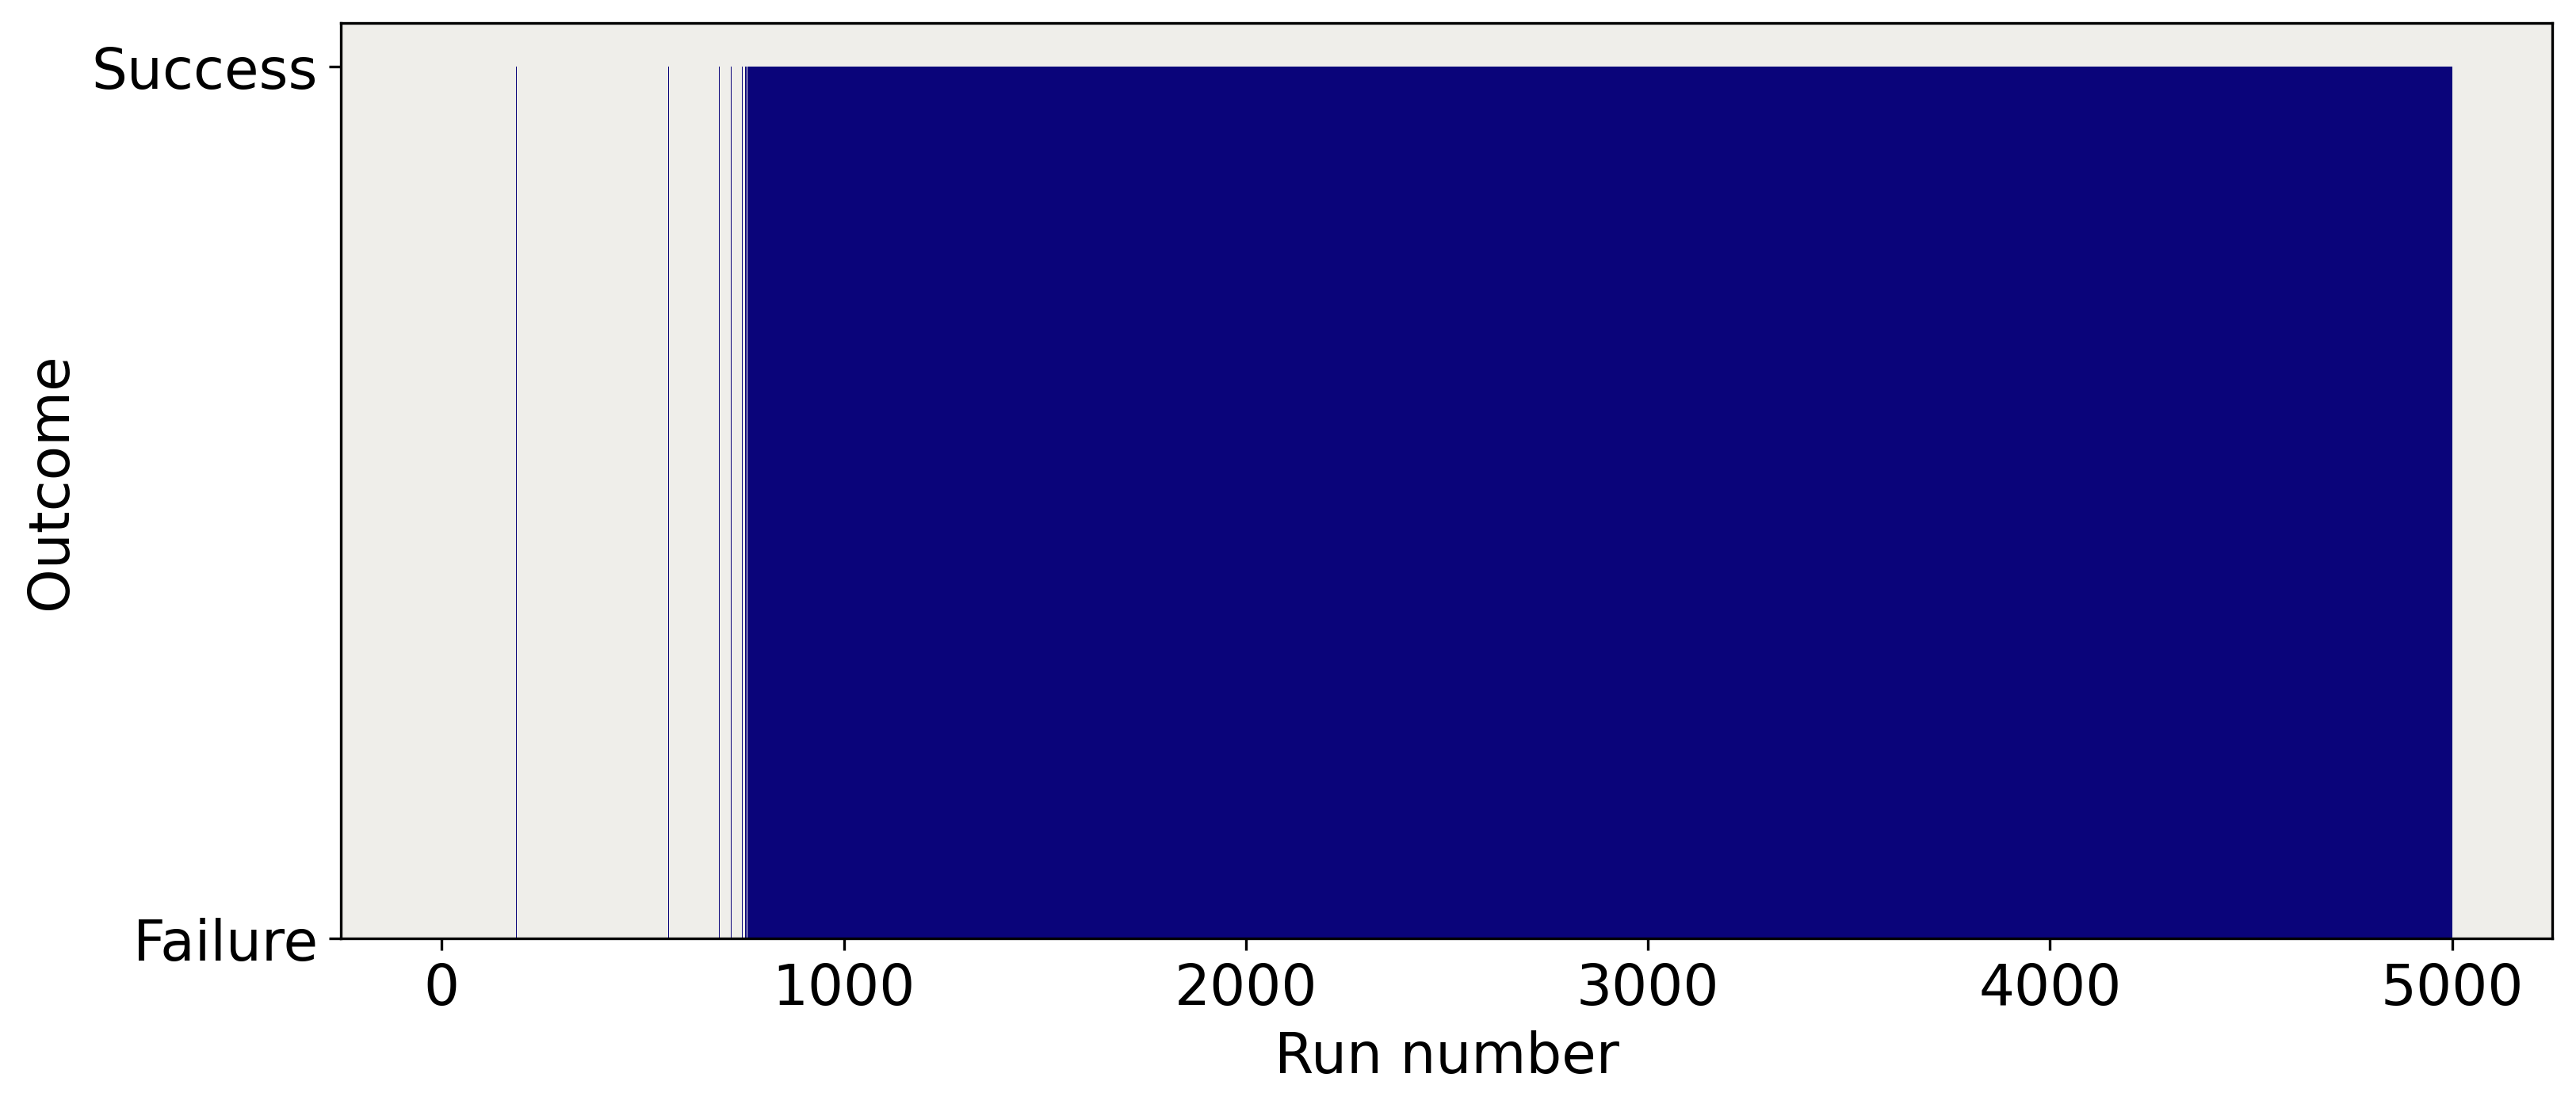

In [10]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Assuming you have already created the 'environment' object
# environment = gym.make('FrozenLake-v1')

plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 5000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        # If there's no best action (only zeros), take a random one
        else:
            action = environment.action_space.sample()

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, _ = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()


In [11]:

from IPython.display import clear_output
import time 

state = environment.reset()
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()
    
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info = environment.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

Sequence = [2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1]


In [12]:
# frozen-lake-ex3.py
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

# Actions in human language
actions = {
    'Left': 0,
    'Down': 1,
    'Right': 2, 
    'Up': 3
}

In [17]:
# Variabler
slippery=False


In [16]:
def my_frozenlake(slippery, my_policy):

    print("--- Super amazing policy that will win! ---")
    print(my_policy)
    print("Maze is slippery: ", slippery)

    # env = gym.make("FrozenLake-v1", is_slippery=slippery, render_mode="human")
    # env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=slippery )
    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=slippery , render_mode="human")
    env.reset()
    env.render()

    for a in my_policy:
        new_state, reward, done, truncated, info = env.step(a)
        print()
        env.render()
        print("Reward: {:.2f}".format(reward))
        print("Action:",a)
        print(info)
        print("Position:",new_state)
        if done:
            if reward == 1:
                print("****You reached the goal!****")
            else:
                print("****You fell through a hole!****")
            break
    env.close()

In [18]:
slippery=False
my_frozenlake(slippery, sequence)

--- Super amazing policy that will win! ---
[2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1]
Maze is slippery:  False

Reward: 0.00
Action: 2
{'prob': 1.0}
Position: 1

Reward: 0.00
Action: 2
{'prob': 1.0}
Position: 2

Reward: 0.00
Action: 2
{'prob': 1.0}
Position: 3

Reward: 0.00
Action: 2
{'prob': 1.0}
Position: 4

Reward: 0.00
Action: 2
{'prob': 1.0}
Position: 5

Reward: 0.00
Action: 1
{'prob': 1.0}
Position: 13

Reward: 0.00
Action: 2
{'prob': 1.0}
Position: 14

Reward: 0.00
Action: 2
{'prob': 1.0}
Position: 15

Reward: 0.00
Action: 1
{'prob': 1.0}
Position: 23

Reward: 0.00
Action: 1
{'prob': 1.0}
Position: 31

Reward: 0.00
Action: 1
{'prob': 1.0}
Position: 39

Reward: 0.00
Action: 1
{'prob': 1.0}
Position: 47

Reward: 0.00
Action: 1
{'prob': 1.0}
Position: 55

Reward: 1.00
Action: 1
{'prob': 1.0}
Position: 63
****You reached the goal!****
